# Dancer's business - 4. Revenue vs Volume $g_{prod}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/dance3.csv')

In [3]:
# Area to look
area = ['All','LA','SanFran','NY','Chicago','Seattle'] # All: U.S.

#  Employment volume - $V_{Gym}$


$$V_{Gym} = number~of~fitness~employee \times annual~wage$$


## Error propagation formula

To multiply $x$ and $y$,

$$product=xy$$

$$product~error=\sqrt{y^2\sigma_x^2+x^2\sigma_y^2}$$

In [4]:
# Define error propagation function
def ep_mul(x,y):
    
    return x*y

def ep_mul_err(x,y,ex,ey):
    
    return ((x*ey)**2+(y*ex)**2)**0.5

## Calculate employment volume

In [5]:
# Get volume
# Divide by 1,000,000,000 to match unit with revenue (in billion dollars)
df['vol'] = df.a_mean*df.tot_emp/1000000000
# Error propagation of volume
df['vol_err'] = df.apply(lambda x: ep_mul_err(x['a_mean'],x['tot_emp'],
                                              x['a_mean_err'],x['emp_err']), axis=1)/1000000000 

In [6]:
# Check if values are correctly calculated
df[(df.area=='NY')&(df.year==2015)][['occ','tot_emp','emp_err','a_mean','a_mean_err','h_mean','h_mean_err','vol','vol_err']]

,occ,tot_emp,emp_err,a_mean,a_mean_err,h_mean,h_mean_err,vol,vol_err
388,all_jobs,9046910.0,27140.730000,59990.000000,179.970000,28.840000,0.086520,542.724131,2.302583
389,dancer,650.0,141.700000,46800.000000,10202.400000,22.500000,4.905000,0.030420,0.009378
390,choreo,350.0,89.950000,71570.000000,18393.490000,34.410000,8.843370,0.025049,0.009104
391,fit_trainer,18870.0,981.240000,62370.000000,3243.240000,29.980000,1.558960,1.176922,0.086550
392,rec_worker,25640.0,1435.840000,30010.000000,1680.560000,14.430000,0.808080,0.769456,0.060938
636,dance_biz,1000.0,167.838889,52627.822483,8921.837206,25.301987,4.289384,0.052628,0.012555
637,fitness_biz,44510.0,1739.099895,36859.623964,1492.135270,17.723187,0.717427,1.640622,0.092304


# Trend of U.S. fitness employment volume $V_{Gym}$

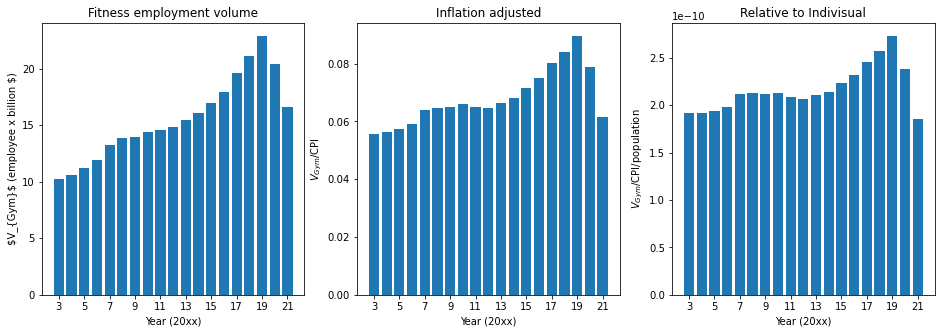

In [9]:
# Select U.S. entire fitness employee statistics
t = df[(df.area=='All')&(df.occ=='fitness_biz')]

plt.rcParams["figure.figsize"] = [16, 5]
fig, ax_arr = plt.subplots(1,3)

# Revenue plot
ax = ax_arr[0]

x = t.year-2000
y = t.vol

ax.bar(x, y)
ax.set_title('Fitness employment volume')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('$V_{Gym}$ (employee x billion $)')
_ = ax.set_xticks(np.arange(3,22, 2))

# Revenue/CPI plot
ax = ax_arr[1]

x = t.year-2000
y = t.vol/t.cpi

ax.bar(x, y)
ax.set_title('Inflation adjusted')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('$V_{Gym}$/CPI')
_ = ax.set_xticks(np.arange(3,22, 2))

# Revenue/CPI/population plot
ax = ax_arr[2]

x = t.year-2000
y = t.vol/t.cpi/t.population

ax.bar(x, y)
ax.set_title('Relative to Indivisual')
ax.set_xlabel('Year (20xx)')
ax.set_ylabel('$V_{Gym}$/CPI/population')
_ = ax.set_xticks(np.arange(3,22, 2))

- From the left plot, $V_{Gym}$ had been growing, then decreasing from 2020.
- From the middle plot, even considering inflation (divided by CPI), the trend stays.
- From the right plot, individual's spending on fitness seems to kept growing since 2013 (no population data from 2020).

# Relationship between nationwide $V_{Gym}$ and  $R_{Gym}$ to get $g_{prod}$

## Uncertainty of a/$V_{Gym}$, when a is a constant

$$\sigma_{a/V} = a/V*\sigma_{V}/V = \frac{a\sigma_{V}}{V^2}$$

In [10]:
def ep_const_div(a,x):
        
        return a/x

def ep_const_div_err(a,x,ex):
        
        return a*ex/x**2

In [25]:
t = df[(df.area=='All')&(df.occ=='fitness_biz')]

# Get Revenue/Volume
t['rev_vol'] = t.fitness/t.vol
t['rev_vol_err'] = t.apply(lambda x: ep_const_div_err(x['fitness'],x['vol'],x['vol_err']),axis=1)

/var/folders/31/7v9nfdf14sz0sxn2xwnq90y00000gn/T/ipykernel_85148/114130122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['rev_vol'] = t.fitness/t.vol
/var/folders/31/7v9nfdf14sz0sxn2xwnq90y00000gn/T/ipykernel_85148/114130122.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['rev_vol_err'] = t.apply(lambda x: ep_const_div_err(x['fitness'],x['vol'],x['vol_err']),axis=1)


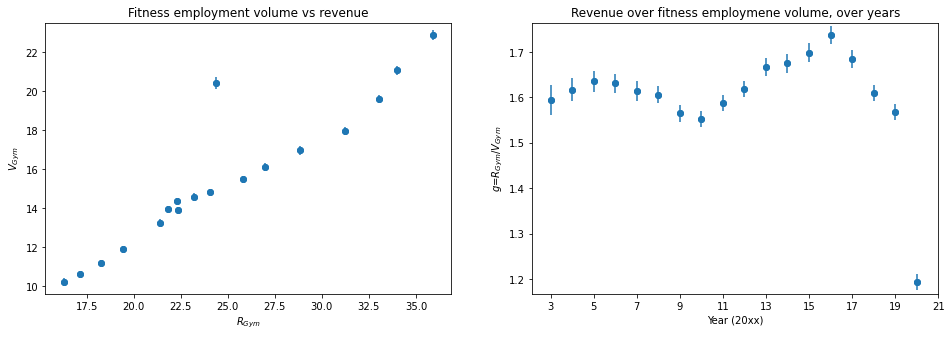

In [13]:
# Select U.S. entire fitness employee statistics
plt.rcParams["figure.figsize"] = [16, 5]
fig, ax_arr = plt.subplots(1,2)

# Revenue vs Revenue
ax = ax_arr[0]

x = t.fitness
y = t.vol
yerr = t.vol_err

ax.scatter(x, y)
ax.errorbar(x, y, yerr, fmt ='o')
ax.set_title('Fitness employment volume vs revenue')
ax.set_xlabel('$R_{Gym}$')
ax.set_ylabel('$V_{Gym}$')




# Revenue/Revenue, yearly
ax = ax_arr[1]

x = t.year-2000
y = t.rev_vol
yerr = t.rev_vol_err

ax.scatter(x, y)
ax.errorbar(x, y, yerr, fmt ='o')
ax.set_title('Revenue over fitness employmene volume, over years')
ax.set_xlabel('Year (20xx)')
_ = ax.set_ylabel('$g$=$R_{Gym}$/$V_{Gym}$')
_ = ax.set_xticks(np.arange(3,22, 2))

- The revenue of fitness business is linearly correlated with the employment volume.
- $g_{prod}$ stays around 1.6 over years, within 10%. It seems to be reasonable to say the employment volume and the revenue in fitness business are proportion.
- The employment volume is nearly 60% of the total revenue, except outlier at 2020, when COVID hit this business.
- $g_{prod}$ are fluctuating slightly betwen years. It seems kept dropping, then rebounded in 2010, then droping since 2016. I'll use $g_{prod}$ as a function of year,

$$g_{prod}=g_{prod}(year).$$

However, before we move on, let's check if the total population has a better correlation to the fitness revenue.

## Correlation between population and fitness revenue

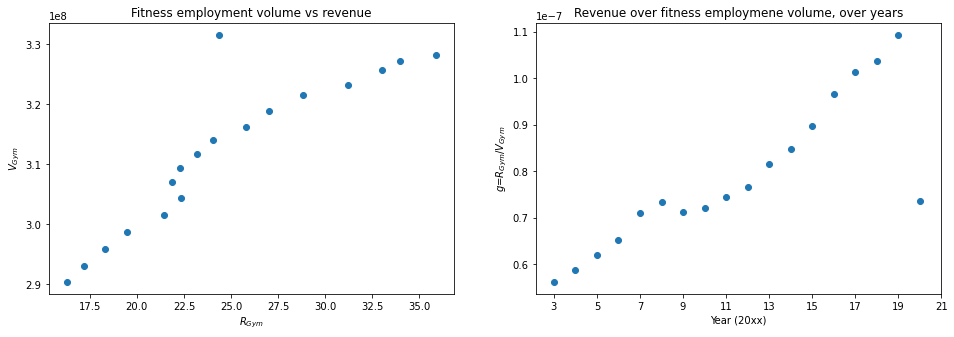

In [27]:
# Select U.S. entire fitness employee statistics
plt.rcParams["figure.figsize"] = [16, 5]
fig, ax_arr = plt.subplots(1,2)

# Revenue vs Population
ax = ax_arr[0]

x = t.fitness
y = t.population

ax.scatter(x, y)
ax.set_title('Fitness employment volume vs revenue')
ax.set_xlabel('$R_{Gym}$')
ax.set_ylabel('Population')

# Revenue/Population, yearly
ax = ax_arr[1]

x = t.year-2000
y = t.fitness/t.population

ax.scatter(x, y)
ax.set_title('Revenue over population, over years')
ax.set_xlabel('Year (20xx)')
_ = ax.set_ylabel('Revenue/Population')
_ = ax.set_xticks(np.arange(3,22, 2))

Indeed the resident population is not a good variable to predict the fitness revenue because it doesn't give the stable ratio (increased by 100% from 2003 to 2011). As mentioned earlier, that is because people's interest in fitness business changes. Rather than the number of population, the size of employment is a better metric of predicting the fitness revenue.

In [14]:
t['g_prod']=t.rev_vol
t['g_prod_err']=t.rev_vol_err
df = df.merge(t[['year','g_prod','g_prod_err']], how='left', on=['year'])

/var/folders/31/7v9nfdf14sz0sxn2xwnq90y00000gn/T/ipykernel_85148/1219393169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['g_prod']=t.rev_vol
/var/folders/31/7v9nfdf14sz0sxn2xwnq90y00000gn/T/ipykernel_85148/1219393169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['g_prod_err']=t.rev_vol_err


# Trend of local employment volume $V_{Gym,~city}$

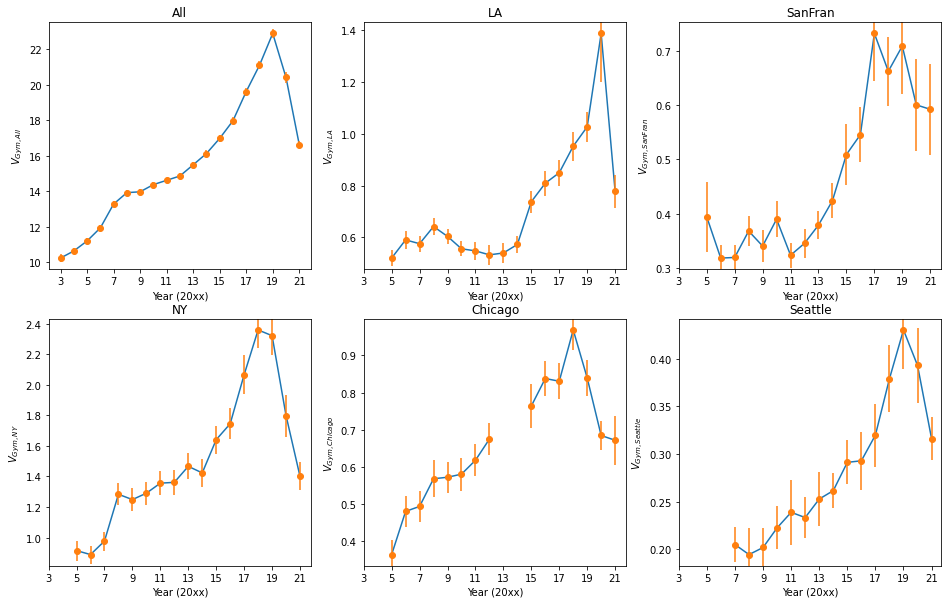

In [16]:
# Plot employment volume
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3)

for i in range(len(area)):  

    t = df[(df.area==area[i])&(df.occ=='fitness_biz')]

    x = t.year-2000
    y = t.vol
    yerr = t.vol_err 
    
    ax = ax_arr[i//3,i%3]

    ax.plot(x, y)
    ax.errorbar(x, y, yerr, fmt ='o')

    ax.set_title(area[i])
    ax.set_xlabel('Year (20xx)')
    ax.set_ylabel('$V_{Gym,'+area[i]+'}$')
    ax.set_xticks(np.arange(3, 22, 2))

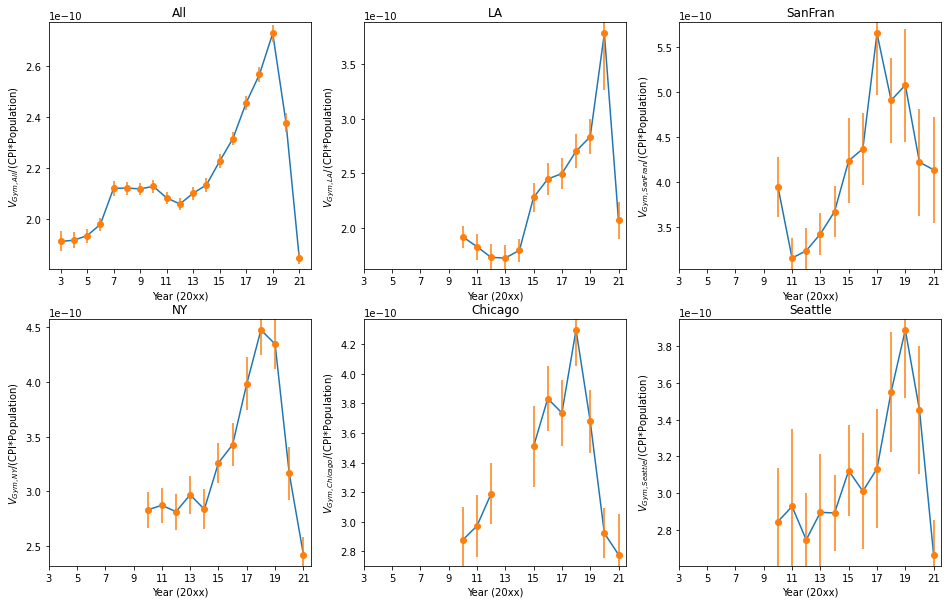

In [17]:
# Plot employment volume, divided by CPI and population
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3)

for i in range(len(area)):  

    t = df[(df.area==area[i])&(df.occ=='fitness_biz')]

    x = t.year-2000
    y = t.vol/t.cpi/t.population
    yerr = t.vol_err/t.cpi/t.population
    
    ax = ax_arr[i//3,i%3]

    ax.plot(x, y)
    ax.errorbar(x, y, yerr, fmt ='o')

    ax.set_title(area[i])
    ax.set_xlabel('Year (20xx)')
    ax.set_ylabel('$V_{Gym,'+area[i]+'}$/(CPI*Population)')
    ax.set_xticks(np.arange(3, 22, 2))

- Overall volumes are growing, but in San Francisco, NY, and Chicago, it decreased from 2018-2019.
- A lot of decrease from 2020 came from COVID.

# Predict local fitness revenue $R_{Gym,~city}$ using $g_{prod}$ and $V_{Gym,~city}$ 

## Error propagation function (again)


To multiply $x$ and $y$,

$$product=xy$$

$$product~error=\sqrt{y^2\sigma_x^2+x^2\sigma_y^2}$$

In [18]:
def ep_mul(x,y):
    
    return x*y

def ep_mul_err(x,y,ex,ey):
    
    return ((x*ey)**2+(y*ex)**2)**0.5

## Calculate prediction

In [19]:
# Predicted local fitness revenue
df['fitness_rev_pred'] = \
    df.apply(lambda x: ep_mul(x['vol'],x['g_prod']) if x['occ']=='fitness_biz' else np.nan, axis=1)

df['fitness_rev_pred_err'] =\
    df.apply(lambda x: ep_mul_err(x['vol'],x['g_prod'],x['vol_err'],x['g_prod_err']) \
             if x['occ']=='fitness_biz' else np.nan, axis=1)

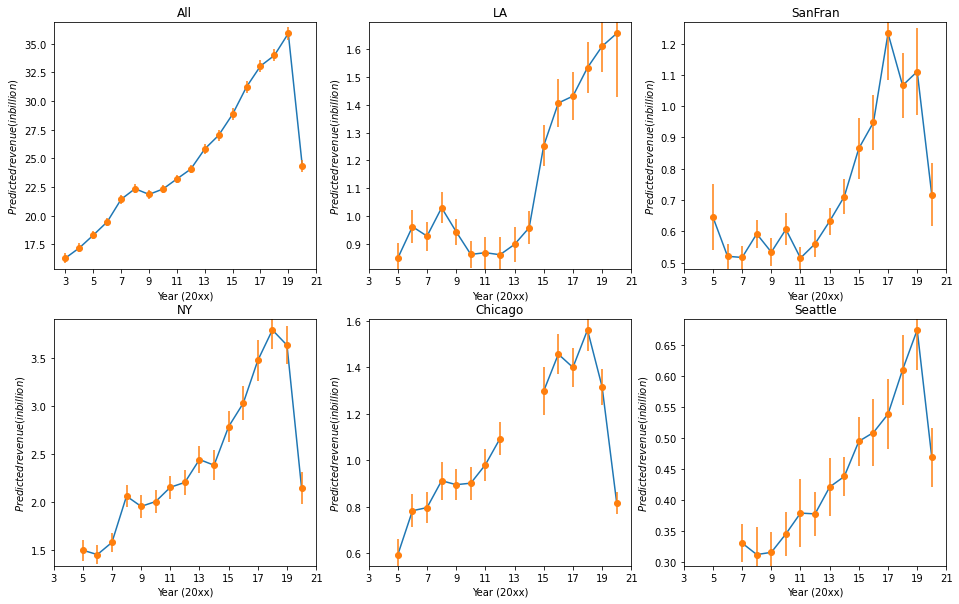

In [22]:
# Plot area fitness revenue result
plt.rcParams["figure.figsize"] = [16, 10]

fig, ax_arr = plt.subplots(2,3)

for i in range(len(area)):  

    t = df[(df.area==area[i])&(df.occ=='fitness_biz')][['year','fitness_rev_pred','fitness_rev_pred_err']]

    ax = ax_arr[i//3,i%3]
    
    x = t.year-2000
    y = t.fitness_rev_pred
    yerr = t.fitness_rev_pred_err
    
    ax = ax_arr[i//3,i%3]

    ax.plot(x, y)
    ax.errorbar(x, y, yerr, fmt ='o')

    ax.set_title(area[i])
    ax.set_xlabel('Year (20xx)')
    ax.set_ylabel('$Predicted revenue (in billion $)')
    ax.set_xticks(np.arange(3, 22, 2))    
     

## Intrim cross check with other available data

Are these reasonable?
Let's compare with available data.
The only area that I could find was NY.
[Source: Statista](https://www.statista.com/forecasts/1206968/fitness-and-recreational-sports-centres-revenue-in-new-york)
![Statista](data/ny_gym_rev.jpg)

From 2012-2019, the Statista's analysis (their source is premium information) the NY fitness revenue is from \\$2.8-3.6 billion, whereas my prediction is \\$2.2-3.6. The values are quite close.
The prediction in 2021, however, showed big difference.
That's because while the national fitness business is attacked harshly by COVID19, 
NY's fitness business was relatively robust, so prediction with national data showed big variance.
However, note that the definition of NY in my model is the metropolitan statistical area (MSA). It is not clear if NY in this Statista graph represents the city, MSA, or the state.

# Save updated dataset

In [23]:
#%%script false --no-raise-error

# Merge g_prod to dataset

# Update dataset
df.to_csv('data/dance4.csv',index=False)